## Time Series Analysis: Home Assignment 2

due to **14.03.21 23:00** MSK


Enter your name below: 

In [360]:
name='Ryzhkov Kirill'

### Contents

1. **Data preparation (6 points)**
    0. Import functions 
    1. Data parsing(1.5 pt.)
    2. Join datasets (1 pt.)
    3. Dates transformation (2 pt.)
    4. Plot time series (0.75 pt.)
    5. Test and train split (0.75 pt.)
    
 
2. **ARIMA models (6 points)**

    1. Stationarity (0.75 pt.) 
    2. AutoArima (1.5 pt.)
    3. AutoSarima (1.5 pt.)
    4. GridSearch (1 pt.)
    5. Interval forecasts (1.25 pt.)

    

## 1. Data preparation
[back to contents](#Contents)

### 1.0 Import functions
[back to contents](#Contents)

In [361]:
# !pip install sktime
# !pip3 uninstall statsmodels

In [362]:
# !pip3 install git+https://github.com/statsmodels/statsmodels.git

In [363]:
import pandas as pd
import numpy as np
import pmdarima as pm
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import SlidingWindowSplitter, ForecastingGridSearchCV
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.arima import AutoARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from sktime.performance_metrics.forecasting import smape_loss

In [364]:
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

### 1.1 Data parsing (1.5 pt.)
[back to contents](#Contents)

You need to parse quarterly sales data for Amazon. 

```dfs=pd.read_html('https://ycharts.com/companies/AMZN/revenues')```

```read_html``` reads HTML tables.  


In [365]:
# code here (0.25 pt.)
dfs = pd.read_html('https://ycharts.com/companies/AMZN/revenues')

How many tables have been read by ```read_html```?

To answer this question find the length of the list dfs: ```len(dfs)```

In [366]:
# code here (0.25 pt.)
len(dfs)

5

Which tables from ```dfs``` will you use further?

In [367]:
# code here (0.5 pt.)
print(dfs)
# первые две

[   Data for this Date Range Unnamed: 1
0             Dec. 31, 2020    125.56B
1            Sept. 30, 2020     96.14B
2             June 30, 2020     88.91B
3            March 31, 2020     75.45B
4             Dec. 31, 2019     87.44B
5            Sept. 30, 2019     69.98B
6             June 30, 2019     63.40B
7            March 31, 2019     59.70B
8             Dec. 31, 2018     72.38B
9            Sept. 30, 2018     56.58B
10            June 30, 2018     52.89B
11           March 31, 2018     51.04B
12            Dec. 31, 2017     60.45B
13           Sept. 30, 2017     43.74B
14            June 30, 2017     37.96B
15           March 31, 2017     35.71B
16            Dec. 31, 2016     43.74B
17           Sept. 30, 2016     32.71B
18            June 30, 2016     30.40B
19           March 31, 2016     29.13B
20            Dec. 31, 2015     35.75B
21           Sept. 30, 2015     25.36B
22            June 30, 2015     23.18B
23           March 31, 2015     22.72B
24            Dec. 31, 2

Create a new dataframe for sales from 2014 to 2020

```df1=dfs[0]```

In [368]:
# code here (0.25 pt.)
df1=dfs[0]
print(df1)

   Data for this Date Range Unnamed: 1
0             Dec. 31, 2020    125.56B
1            Sept. 30, 2020     96.14B
2             June 30, 2020     88.91B
3            March 31, 2020     75.45B
4             Dec. 31, 2019     87.44B
5            Sept. 30, 2019     69.98B
6             June 30, 2019     63.40B
7            March 31, 2019     59.70B
8             Dec. 31, 2018     72.38B
9            Sept. 30, 2018     56.58B
10            June 30, 2018     52.89B
11           March 31, 2018     51.04B
12            Dec. 31, 2017     60.45B
13           Sept. 30, 2017     43.74B
14            June 30, 2017     37.96B
15           March 31, 2017     35.71B
16            Dec. 31, 2016     43.74B
17           Sept. 30, 2016     32.71B
18            June 30, 2016     30.40B
19           March 31, 2016     29.13B
20            Dec. 31, 2015     35.75B
21           Sept. 30, 2015     25.36B
22            June 30, 2015     23.18B
23           March 31, 2015     22.72B
24            Dec. 31, 20

Create a new dataframe for sales from 2008 to 2014

```df2=dfs[1]```

In [369]:
# code here (0.25 pt.)
df2=dfs[1]
print(df2)

        Unnamed: 0 Unnamed: 1
0   Sept. 30, 2014     20.58B
1    June 30, 2014     19.34B
2   March 31, 2014     19.74B
3    Dec. 31, 2013     25.59B
4   Sept. 30, 2013     17.09B
5    June 30, 2013     15.70B
6   March 31, 2013     16.07B
7    Dec. 31, 2012     21.27B
8   Sept. 30, 2012     13.81B
9    June 30, 2012     12.83B
10  March 31, 2012     13.18B
11   Dec. 31, 2011     17.43B
12  Sept. 30, 2011     10.88B
13   June 30, 2011     9.913B
14  March 31, 2011     9.857B
15   Dec. 31, 2010     12.95B
16  Sept. 30, 2010      7.56B
17   June 30, 2010     6.566B
18  March 31, 2010     7.131B
19   Dec. 31, 2009      9.52B
20  Sept. 30, 2009     5.449B
21   June 30, 2009     4.651B
22  March 31, 2009     4.889B
23   Dec. 31, 2008     6.703B
24  Sept. 30, 2008     4.264B


### 1.2 Join datasets (1 pt.)
[back to contents](#Contents)

Join two datasets ```df1, df2```:

```joined_data=np.concatenate([...,...])```

In [370]:
# code here (0.25 pt.)
joined_data=np.concatenate([df1,df2])
print(joined_data)

[['Dec. 31, 2020' '125.56B']
 ['Sept. 30, 2020' '96.14B']
 ['June 30, 2020' '88.91B']
 ['March 31, 2020' '75.45B']
 ['Dec. 31, 2019' '87.44B']
 ['Sept. 30, 2019' '69.98B']
 ['June 30, 2019' '63.40B']
 ['March 31, 2019' '59.70B']
 ['Dec. 31, 2018' '72.38B']
 ['Sept. 30, 2018' '56.58B']
 ['June 30, 2018' '52.89B']
 ['March 31, 2018' '51.04B']
 ['Dec. 31, 2017' '60.45B']
 ['Sept. 30, 2017' '43.74B']
 ['June 30, 2017' '37.96B']
 ['March 31, 2017' '35.71B']
 ['Dec. 31, 2016' '43.74B']
 ['Sept. 30, 2016' '32.71B']
 ['June 30, 2016' '30.40B']
 ['March 31, 2016' '29.13B']
 ['Dec. 31, 2015' '35.75B']
 ['Sept. 30, 2015' '25.36B']
 ['June 30, 2015' '23.18B']
 ['March 31, 2015' '22.72B']
 ['Dec. 31, 2014' '29.33B']
 ['Sept. 30, 2014' '20.58B']
 ['June 30, 2014' '19.34B']
 ['March 31, 2014' '19.74B']
 ['Dec. 31, 2013' '25.59B']
 ['Sept. 30, 2013' '17.09B']
 ['June 30, 2013' '15.70B']
 ['March 31, 2013' '16.07B']
 ['Dec. 31, 2012' '21.27B']
 ['Sept. 30, 2012' '13.81B']
 ['June 30, 2012' '12.83B']
 [

Change a format of ```joined_data``` to pandas dataframe:

```df=pd.DataFrame(...)```

In [371]:
# code here (0.25 pt.)
df=pd.DataFrame(joined_data)

Rename columns to ```'date'``` and ```'sales'```:

```df.columns = ['...','...']```

In [372]:
# code here (0.25 pt.)
df.columns = ['date','sales']
print(df)

              date    sales
0    Dec. 31, 2020  125.56B
1   Sept. 30, 2020   96.14B
2    June 30, 2020   88.91B
3   March 31, 2020   75.45B
4    Dec. 31, 2019   87.44B
5   Sept. 30, 2019   69.98B
6    June 30, 2019   63.40B
7   March 31, 2019   59.70B
8    Dec. 31, 2018   72.38B
9   Sept. 30, 2018   56.58B
10   June 30, 2018   52.89B
11  March 31, 2018   51.04B
12   Dec. 31, 2017   60.45B
13  Sept. 30, 2017   43.74B
14   June 30, 2017   37.96B
15  March 31, 2017   35.71B
16   Dec. 31, 2016   43.74B
17  Sept. 30, 2016   32.71B
18   June 30, 2016   30.40B
19  March 31, 2016   29.13B
20   Dec. 31, 2015   35.75B
21  Sept. 30, 2015   25.36B
22   June 30, 2015   23.18B
23  March 31, 2015   22.72B
24   Dec. 31, 2014   29.33B
25  Sept. 30, 2014   20.58B
26   June 30, 2014   19.34B
27  March 31, 2014   19.74B
28   Dec. 31, 2013   25.59B
29  Sept. 30, 2013   17.09B
30   June 30, 2013   15.70B
31  March 31, 2013   16.07B
32   Dec. 31, 2012   21.27B
33  Sept. 30, 2012   13.81B
34   June 30, 2012  

Delete 'B' in each row in ``` 'sales' ``` column and transform it to float format:

```df['...']=df['...'].apply(lambda x: float(x[:len(x)-1]))```

lambda function ```lambda x:``` applies a function after  ```:```  to each row in ```df['...']```.

```float(...)``` changes a format to float. This part of the code ```x[:len(x)-1]``` returns a string ```x``` without the last character ```'B'```. 

In [373]:
# code here (0.25 pt.)
df['sales']=df['sales'].apply(lambda x: float(x[:len(x)-1]))
print(df)

              date    sales
0    Dec. 31, 2020  125.560
1   Sept. 30, 2020   96.140
2    June 30, 2020   88.910
3   March 31, 2020   75.450
4    Dec. 31, 2019   87.440
5   Sept. 30, 2019   69.980
6    June 30, 2019   63.400
7   March 31, 2019   59.700
8    Dec. 31, 2018   72.380
9   Sept. 30, 2018   56.580
10   June 30, 2018   52.890
11  March 31, 2018   51.040
12   Dec. 31, 2017   60.450
13  Sept. 30, 2017   43.740
14   June 30, 2017   37.960
15  March 31, 2017   35.710
16   Dec. 31, 2016   43.740
17  Sept. 30, 2016   32.710
18   June 30, 2016   30.400
19  March 31, 2016   29.130
20   Dec. 31, 2015   35.750
21  Sept. 30, 2015   25.360
22   June 30, 2015   23.180
23  March 31, 2015   22.720
24   Dec. 31, 2014   29.330
25  Sept. 30, 2014   20.580
26   June 30, 2014   19.340
27  March 31, 2014   19.740
28   Dec. 31, 2013   25.590
29  Sept. 30, 2013   17.090
30   June 30, 2013   15.700
31  March 31, 2013   16.070
32   Dec. 31, 2012   21.270
33  Sept. 30, 2012   13.810
34   June 30, 2012  

### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [374]:
# code here (0.25 pt.)
type(df['date'][1])
print(df['date'][1])

Sept. 30, 2020


Change abbreviations of months to their names.

Create a dictionary with keys = abbreviations and values = months' names. 

dict_month={'Dec.':'December','Sept.':'September','June':'June','March':'March'}


```df['date']=df['date'].apply(lambda x: dict_month[x[0:len(x)-9]]+x[len(x)-9:len(x)])```

In [375]:
# code here (0.5 pt.)
dict_month={'Dec.':'December','Sept.':'September','June':'June','March':'March'}
df['date']=df['date'].apply(lambda x: dict_month[x[0:len(x)-9]]+x[len(x)-9:len(x)])
print(df)

                  date    sales
0    December 31, 2020  125.560
1   September 30, 2020   96.140
2        June 30, 2020   88.910
3       March 31, 2020   75.450
4    December 31, 2019   87.440
5   September 30, 2019   69.980
6        June 30, 2019   63.400
7       March 31, 2019   59.700
8    December 31, 2018   72.380
9   September 30, 2018   56.580
10       June 30, 2018   52.890
11      March 31, 2018   51.040
12   December 31, 2017   60.450
13  September 30, 2017   43.740
14       June 30, 2017   37.960
15      March 31, 2017   35.710
16   December 31, 2016   43.740
17  September 30, 2016   32.710
18       June 30, 2016   30.400
19      March 31, 2016   29.130
20   December 31, 2015   35.750
21  September 30, 2015   25.360
22       June 30, 2015   23.180
23      March 31, 2015   22.720
24   December 31, 2014   29.330
25  September 30, 2014   20.580
26       June 30, 2014   19.340
27      March 31, 2014   19.740
28   December 31, 2013   25.590
29  September 30, 2013   17.090
30      

Transform dates to datetime format:

``` df['...']=pd.to_datetime(df['...'], format='...') ```

Use the appropriatee format. For example, for ```'2020---13 : December'``` the format is ```'%Y---%d : %B'```.

For ```'11, March.,2013'``` you need to use  ```'%d, %B.,%Y'```


In [376]:
# code here (0.5 pt.)
df['date']=pd.to_datetime(df['date'], format='%B %d, %Y')
print(df)

         date    sales
0  2020-12-31  125.560
1  2020-09-30   96.140
2  2020-06-30   88.910
3  2020-03-31   75.450
4  2019-12-31   87.440
5  2019-09-30   69.980
6  2019-06-30   63.400
7  2019-03-31   59.700
8  2018-12-31   72.380
9  2018-09-30   56.580
10 2018-06-30   52.890
11 2018-03-31   51.040
12 2017-12-31   60.450
13 2017-09-30   43.740
14 2017-06-30   37.960
15 2017-03-31   35.710
16 2016-12-31   43.740
17 2016-09-30   32.710
18 2016-06-30   30.400
19 2016-03-31   29.130
20 2015-12-31   35.750
21 2015-09-30   25.360
22 2015-06-30   23.180
23 2015-03-31   22.720
24 2014-12-31   29.330
25 2014-09-30   20.580
26 2014-06-30   19.340
27 2014-03-31   19.740
28 2013-12-31   25.590
29 2013-09-30   17.090
30 2013-06-30   15.700
31 2013-03-31   16.070
32 2012-12-31   21.270
33 2012-09-30   13.810
34 2012-06-30   12.830
35 2012-03-31   13.180
36 2011-12-31   17.430
37 2011-09-30   10.880
38 2011-06-30    9.913
39 2011-03-31    9.857
40 2010-12-31   12.950
41 2010-09-30    7.560
42 2010-06-

Change index to dates:

``` df.index=.... ```

In [377]:
# code here (0.1 pt.)
df.index=df['date']

What is the size of the dataset?

use ```.shape```

In [378]:
# code here (0.1 pt.)
df.shape

(50, 2)

Drop columns ['date']:

```df=df.drop(..., axis=1)```

In [379]:
# code here (0.2 pt.)
df=df.drop('date', axis=1)
print(df)

              sales
date               
2020-12-31  125.560
2020-09-30   96.140
2020-06-30   88.910
2020-03-31   75.450
2019-12-31   87.440
2019-09-30   69.980
2019-06-30   63.400
2019-03-31   59.700
2018-12-31   72.380
2018-09-30   56.580
2018-06-30   52.890
2018-03-31   51.040
2017-12-31   60.450
2017-09-30   43.740
2017-06-30   37.960
2017-03-31   35.710
2016-12-31   43.740
2016-09-30   32.710
2016-06-30   30.400
2016-03-31   29.130
2015-12-31   35.750
2015-09-30   25.360
2015-06-30   23.180
2015-03-31   22.720
2014-12-31   29.330
2014-09-30   20.580
2014-06-30   19.340
2014-03-31   19.740
2013-12-31   25.590
2013-09-30   17.090
2013-06-30   15.700
2013-03-31   16.070
2012-12-31   21.270
2012-09-30   13.810
2012-06-30   12.830
2012-03-31   13.180
2011-12-31   17.430
2011-09-30   10.880
2011-06-30    9.913
2011-03-31    9.857
2010-12-31   12.950
2010-09-30    7.560
2010-06-30    6.566
2010-03-31    7.131
2009-12-31    9.520
2009-09-30    5.449
2009-06-30    4.651
2009-03-31    4.889


What is the size of the dataset now?

In [380]:
# code here (0.1 pt.)
df.shape

(50, 1)

Change the frequency of the data to make x-labels readable:

```df.index=df.index.to_period('...')```

use ```'Q' ``` for quarterly data, ```'M' ``` for monthly data. 

In [381]:
# code here (0.25 pt.)
# df.index=df.index.to_period('M')
# M = df.index.to_period('Q')
df.index=df.index.to_period('Q')

### 1.4 Plot time series (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['sales']```

In [382]:
# code here (0.25 pt.)
y=df['sales']

```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [383]:
# code here (0.25 pt.)
y = np.flip(y,0)
print(y)

date
2008Q3      4.264
2008Q4      6.703
2009Q1      4.889
2009Q2      4.651
2009Q3      5.449
2009Q4      9.520
2010Q1      7.131
2010Q2      6.566
2010Q3      7.560
2010Q4     12.950
2011Q1      9.857
2011Q2      9.913
2011Q3     10.880
2011Q4     17.430
2012Q1     13.180
2012Q2     12.830
2012Q3     13.810
2012Q4     21.270
2013Q1     16.070
2013Q2     15.700
2013Q3     17.090
2013Q4     25.590
2014Q1     19.740
2014Q2     19.340
2014Q3     20.580
2014Q4     29.330
2015Q1     22.720
2015Q2     23.180
2015Q3     25.360
2015Q4     35.750
2016Q1     29.130
2016Q2     30.400
2016Q3     32.710
2016Q4     43.740
2017Q1     35.710
2017Q2     37.960
2017Q3     43.740
2017Q4     60.450
2018Q1     51.040
2018Q2     52.890
2018Q3     56.580
2018Q4     72.380
2019Q1     59.700
2019Q2     63.400
2019Q3     69.980
2019Q4     87.440
2020Q1     75.450
2020Q2     88.910
2020Q3     96.140
2020Q4    125.560
Freq: Q-DEC, Name: sales, dtype: float64


Plot the series using ```plot_series()```

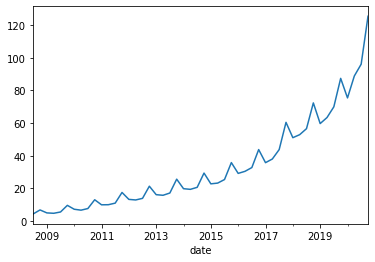

In [384]:
# code here (0.25 pt.)

y.plot() 
plt.show() 

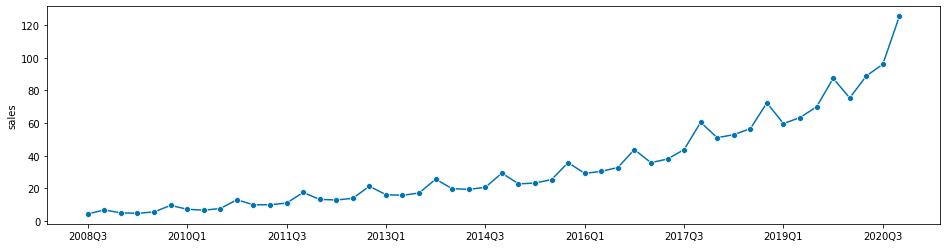

In [385]:
ax=plot_series(y)

### 1.5 Split the data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [386]:
# code here (0.5 pt.)
y_train, y_test = temporal_train_test_split(y, test_size=0.2)

plot train and test samples using ```plot_series``` 

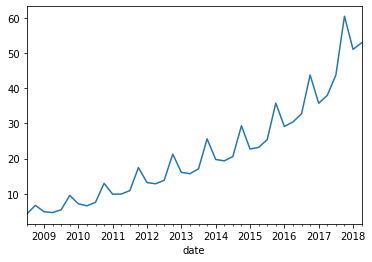

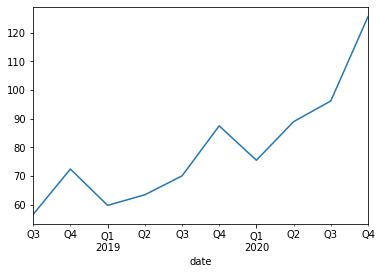

In [387]:
# code here (0.25 pt.)
y_train.plot() 
plt.show() 
y_test.plot() 
plt.show() 

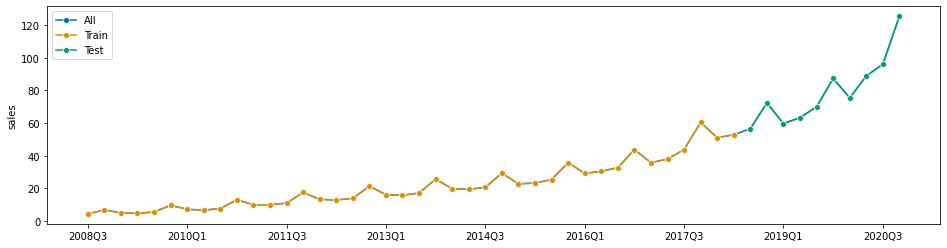

In [388]:
ax=plot_series(y, y_train, y_test, labels=['All','Train', 'Test'])

  

## 2. ARIMA models (6 pt.)
[back to contents](#Contents)

### 2.1 Check stationarity (0.75 pt.)
[back to contents](#Contents)

Check whether the time series  is stationary

Use ```adfuller``` and ```kpss```

In [389]:
# code here (0.15 pt.)
adfuller(y_train)[1]<0.05
# adfuller(y_test)
# adfuller(y)

False

In [390]:
# code here (0.15 pt.)
kpss(y_train)[1]>0.05

print('so its non-stationary')

so its non-stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2041: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


If it is not stationary, take differences until the time series becomes stationary

```np.diff(y_train)```

In [391]:
# code here (0.15 pt.)
adfuller(np.diff(y_train,1))[1] < 0.05

False

In [392]:
adfuller(np.diff(y_train,2))[1] < 0.05

True

In [393]:

ad = adfuller(np.diff(y_train,0), autolag= 'AIC')

print('p_value ', ad[1], ' non stationary as > 0.05 ')

p_value  0.9906643757133605  non stationary as > 0.05 


In [394]:
# code here (0.15 pt.)
ad = adfuller(np.diff(y_train,2), autolag= 'AIC')

print('p_value ', ad[1], 'stationary as < 0.05 ')

p_value  0.004415810195894061 stationary as < 0.05 


What is the order of integration?

In [395]:
# code here (0.15 pt.)
print('so the order is 3')

so the order is 3


### 2.2 Estimate AutoArima (1.5 pt.)
[back to contents](#Contents)

For this part use ```AutoARIMA``` from ```sktime```

Estimate AutoArima and name the result ```model_AArima```:

```AutoARIMA(suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=1)```

```model_AArima.fit(...)```


In [396]:
# code here (0.25 pt.)
model_AArima = AutoARIMA(suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=1)

model_AArima.fit(y_train)

AutoARIMA(d=1, max_p=4, max_q=4, suppress_warnings=True)

What specification of ```ARIMA(p,d,q)``` has been chosen as the best?

```.summary()``` 

In [397]:
# code here (0.25 pt.)
model_AArima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -115.169
Date:                Sun, 14 Mar 2021   AIC                            236.338
Time:                        16:03:36   BIC                            241.328
Sample:                             0   HQIC                           238.128
                                 - 40                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2558      0.569      2.206      0.027       0.140       2.372
ma.L1         -0.6181      0.254     -2.437      0.015      -1.115      -0.121
sigma2        21.2397      6.377      3.331      0.001       8.742      33.738
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                50.74
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               5.91   Skew:                             1.94
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [398]:
# code here (0.5 pt.)
print('ARIMA(0,1,1)')

ARIMA(0,1,1)


Make predictions for ```fh=np.arange(len(...)) + 1``` 

```model_AArima.predict(fh=...)```

In [399]:
# code here (0.25 pt.)
y_pred = model_AArima.predict(fh=np.arange(len(y_test)) + 1)

Plot ```y_train, y_test, y_pred_AArima``` using ```plot_series(...)```and calculate SMAPE forecast quality metric:```smape_loss(...)```

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2ec37d8a50>)

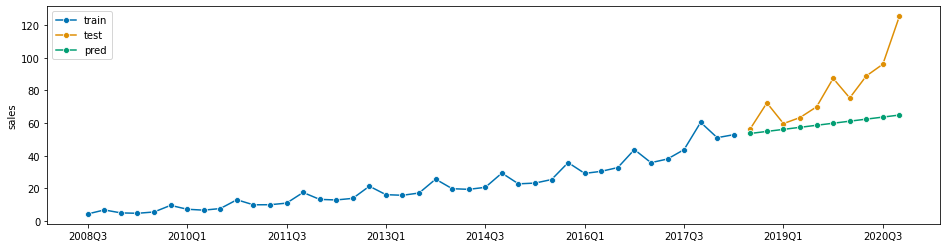

In [400]:
# code here (0.25 pt.)
plot_series(y_train, y_test, y_pred, labels=['train', 'test','pred'])
# smape_loss(y_test,y_pred)

### 2.3 Estimate AutoSarima (1.5 pt.)
[back to contents](#Contents)

For this part use ```AutoARIMA``` from ```sktime``` as well

Estimate AutoSarima and name the result ```model_ASArima```

The only difference from AutoArima is the seasonality period inside ```AutoARIMA```:

```AutoARIMA(sp=...,suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=1)```

```model_ASArima.fit(...)```


In [401]:
# code here (0.25 pt.)
model_ASArima = AutoARIMA(sp=2,suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=1)

model_ASArima.fit(y_train)

AutoARIMA(d=1, max_p=4, max_q=4, sp=2, suppress_warnings=True)

What specification of ```ARIMA(p,d,q)(P,D,Q)s``` has been chosen as the best?

```.summary()``` 

In [402]:
# code here (0.25 pt.)
model_ASArima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   40
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 2)   Log Likelihood                 -63.553
Date:                           Sun, 14 Mar 2021   AIC                            139.106
Time:                                   16:03:40   BIC                            148.772
Sample:                                        0   HQIC                           142.514
                                            - 40                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0059      0.034      0.170      0.865      -0.062       0.073
ma.L1          0.6286      0.253      2.487      0.013       0.133       1.124
ar.S.L2        0.0001      0.050      0.002      0.998      -0.097       0.098
ar.S.L4        0.9837      0.044     22.481      0.000       0.898       1.069
ma.S.L2       -0.8620      0.315     -2.735      0.006      -1.480      -0.244
sigma2         1.2731      0.405      3.141      0.002       0.479       2.068
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                15.07
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               4.59   Skew:                            -0.03
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [403]:
# code here (0.5 pt.)
print('ARIMA(1,1,0)(0,1,0)24')

ARIMA(1,1,0)(0,1,0)24


Make predictions for ```fh=np.arange(len(...)) + 1``` 

```model_ASArima.predict(fh=...)```

In [404]:
# code here (0.25 pt.)
y_pred1 = model_ASArima.predict(fh=np.arange(len(y_test)) + 1)

Plot ```y_train, y_test, y_pred_AArima``` using ```plot_series(...)```and calculate SMAPE forecast quality metric:```smape_loss(...)```

0.07247603600667135

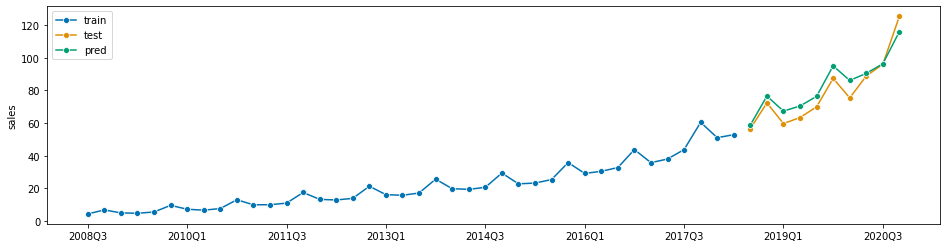

In [405]:
# code here (0.25 pt.)
plot_series(y_train, y_test, y_pred1, labels=['train', 'test','pred'])
smape_loss(y_test,y_pred1)

### 2.4 GridSearch (1 pt.)
[back to contents](#Contents)

Use GridSearch to choose the seasonality period, which gives the highest SMAPE 

```model = AutoARIMA(suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=1)```

Cross validation

```CV= SlidingWindowSplitter(initial_window = 20, step_length = 4 , fh = 10)```

```gscv = ForecastingGridSearchCV(model,cv=CV,param_grid={'sp':[2, 4, 8]})```

Fit on the train set:

gscv.fit()

Return results

df=pd.DataFrame(gscv. ...)

Sort values in df by ```'rank_test_sMAPE'```

```df.sort_values(by=['...'])```

In [406]:
# code here (0.75 pt.)
model = AutoARIMA(suppress_warnings=True,start_p=2, max_p=4, start_q=2, max_q=4, d=1)
CV= SlidingWindowSplitter(initial_window = 20, step_length = 4 , fh = 10)

gscv = ForecastingGridSearchCV(model,cv=CV,param_grid={'sp':[2, 4, 8,12,24]})

gscv.fit(y_train)

df=pd.DataFrame(gscv.cv_results_)
df.sort_values(by=['rank_test_sMAPE'])

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/utils.py:120: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (8) is shorter than m (12). Using D=1
  % (len(x), m, D))
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/usr/local/lib/

,mean_fit_time,mean_score_time,param_sp,params,mean_test_sMAPE,rank_test_sMAPE
0,4.460956,0.046283,2,{'sp': 2},0.292288,1
1,6.024399,0.033606,4,{'sp': 4},0.346315,2
3,1.913370,0.033924,12,{'sp': 12},0.394256,3
2,5.027531,0.033664,8,{'sp': 8},0.413893,4
4,0.000772,0.000000,24,{'sp': 24},NaN,5


What seasonality period would you choose and why?

In [410]:
gscv.get_fitted_params()

{'ar.S.L2': 0.00011153523584129903,
 'ar.S.L4': 0.9836793038636676,
 'intercept': 0.005853876592751224,
 'ma.L1': 0.6286295307420056,
 'ma.S.L2': -0.861966685241821,
 'sigma2': 1.2730847832298002}

In [407]:
# code here (0.25 pt.)
print('2, cause it has best test estimate')

2, cause it has best test estimate


### 2.5 Interval forecasts AutoArima (1.25 pt.)
[back to contents](#Contents)

Get 95% confidence intervals either for ```model_ASArima``` or for ```gscv```:

For example:

```y_pred_ASArima_best=model_ASArima.predict(fh=..., return_pred_int=True)```

Mean forecast or point forecast

mean=y_pred_ASArima_best[0]

Lower and upper bounds

upper_int=...

lower_int=...

In [412]:
# code here (1 pt.)
y_pred_ASArima_best=model_ASArima.predict(fh=np.arange(len(y_test)) + 1, return_pred_int=True, alpha = 0.05)

mean=y_pred_ASArima_best[0]

Plot mean forecast, upper and lower intervals, test set:

```plot_series()```

In [424]:
# code here (0.25 pt.)
